# Les vins espagnols

### Import des packages

In [1]:
import numpy as np
import pandas as pd
import scipy.sparse
import seaborn as sns
from functions import *
import scipy.stats as stats
from scipy.stats import norm
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

### Lecture du CSV et de ses données

In [2]:
df = pd.read_csv('wines_SPA.csv')
df.sample(4)

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
1553,El Maestro Sierra,Oloroso Extra Viejo 1/7,N.V.,4.3,78,Espana,Jerez-Xeres-Sherry,217.8,Sherry,4.0,3.0
1251,Muga,Torre Muga,2005,4.3,468,Espana,Rioja,99.9,Rioja Red,4.0,3.0
4172,Matarromera,Gran Reserva,2011,4.2,389,Espana,Ribera del Duero,64.5,Ribera Del Duero Red,5.0,3.0
2525,La Vicalanda,Reserva,2015,4.2,420,Espana,Rioja,17.5,Rioja Red,4.0,3.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


In [4]:
df.describe()

,rating,num_reviews,price,body,acidity
count,7500.000000,7500.000000,7500.000000,6331.000000,6331.000000
mean,4.254933,451.109067,60.095822,4.158427,2.946612
std,0.118029,723.001856,150.356676,0.583352,0.248202
min,4.200000,25.000000,4.990000,2.000000,1.000000
25%,4.200000,389.000000,18.900000,4.000000,3.000000
50%,4.200000,404.000000,28.530000,4.000000,3.000000
75%,4.200000,415.000000,51.350000,5.000000,3.000000
max,4.900000,32624.000000,3119.080000,5.000000,3.000000


In [5]:
df.sample()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
2207,La Rioja Alta,Vina Alberdi Crianza,2018,4.2,410,Espana,Rioja,13.58,Rioja Red,4.0,3.0


In [6]:
df.nunique()

winery          480
wine            847
year             71
rating            8
num_reviews     817
country           1
region           76
price          1292
type             21
body              4
acidity           3
dtype: int64

### Nettoyage des données

In [7]:
df.duplicated().any()

True

In [8]:
df = df.loc[df.duplicated() == False]

In [9]:
df.drop(columns=['country'], inplace=True)

In [10]:
df['year'].unique()

array(['2013', '2018', '2009', '1999', '1996', '1998', '2010', '1995',
       '2015', '2011', '2016', '1970', '1946', '1962', '2019', '2004',
       'N.V.', '1931', '1979', '2005', '2020', '2014', '1985', '1929',
       '2007', '2012', '2017', '2008', nan, '2006', '2000', '2003',
       '2002', '1991', '1994', '1990', '1989', '1987', '1986', '1981',
       '2001', '1968', '1964', '1982', '1974', '1983', '1955', '1980',
       '1972', '1953', '1958', '1942', '1965', '1992', '1973', '1997',
       '1967', '1975', '1910', '1961', '1954', '1988', '1969', '1951',
       '1928', '1976', '1949', '2021', '1959', '1922', '1978', '1925'],
      dtype=object)

In [11]:
df = df[df.year != 'N.V.']

In [12]:
df.isna().value_counts()

winery  wine   year   rating  num_reviews  region  price  type   body   acidity
False   False  False  False   False        False   False  False  False  False      1714
                                                                 True   True        163
                                                          True   True   True         99
               True   False   False        False   False  False  False  False         2
dtype: int64

In [13]:
df['type'].unique()

array(['Toro Red', 'Tempranillo', 'Ribera Del Duero Red', 'Pedro Ximenez',
       'Red', 'Priorat Red', 'Rioja Red', 'Rioja White', 'Grenache', nan,
       'Cava', 'Sherry', 'Verdejo', 'Syrah', 'Monastrell', 'Mencia',
       'Sparkling', 'Montsant Red', 'Albarino', 'Chardonnay',
       'Cabernet Sauvignon', 'Sauvignon Blanc'], dtype=object)

In [14]:
df.dropna(inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1714 entries, 0 to 2049
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       1714 non-null   object 
 1   wine         1714 non-null   object 
 2   year         1714 non-null   object 
 3   rating       1714 non-null   float64
 4   num_reviews  1714 non-null   int64  
 5   region       1714 non-null   object 
 6   price        1714 non-null   float64
 7   type         1714 non-null   object 
 8   body         1714 non-null   float64
 9   acidity      1714 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 147.3+ KB


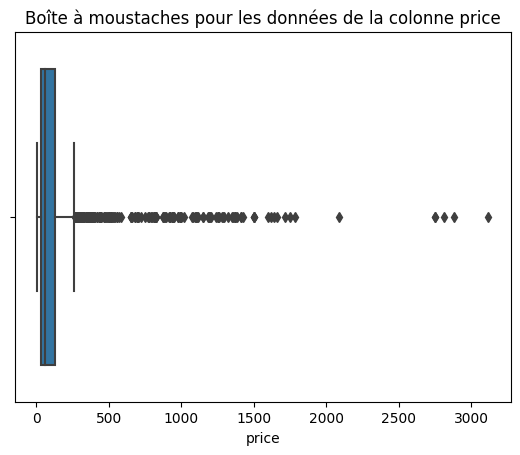

In [16]:
mustache(df, 'price');

In [17]:
mini_price, maxi_price = IQR(df, 'price')

       price
min     6.26
max  3119.08

==> Everything that is less than 0 and more than 263.09 is an outlier !!!


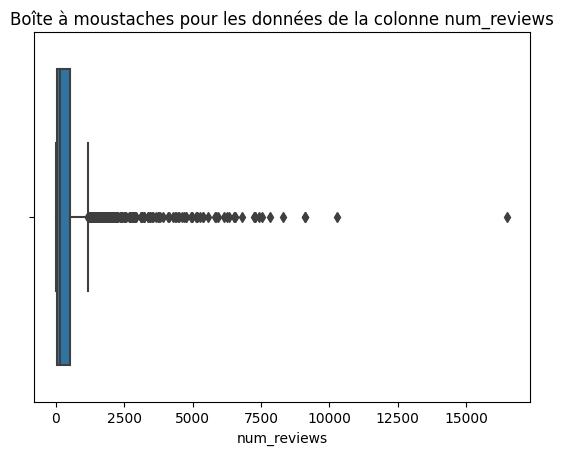

In [18]:
mustache(df, 'num_reviews');

In [19]:
mini_reviews, maxi_reviews = IQR(df, 'num_reviews')

     num_reviews
min         25.0
max      16505.0

==> Everything that is less than 0 and more than 1167.0 is an outlier !!!


##### Malgré les outliers, on décide de les garder pour tester le modèle

### Représentations graphiques des données

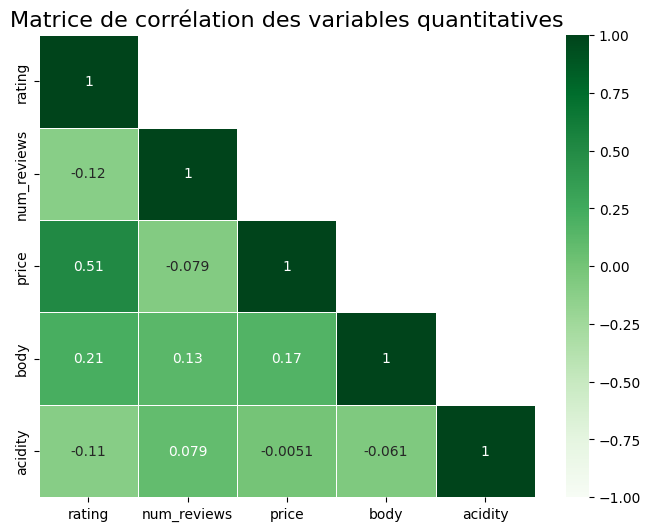

In [20]:
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
mask[np.eye(mask.shape[0], dtype=bool)] = False

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr, vmin=-1, vmax=1, linewidth = 0.5, cmap = 'Greens', mask=mask, annot=True)
plt.title('Matrice de corrélation des variables quantitatives', fontsize=16)
plt.show()

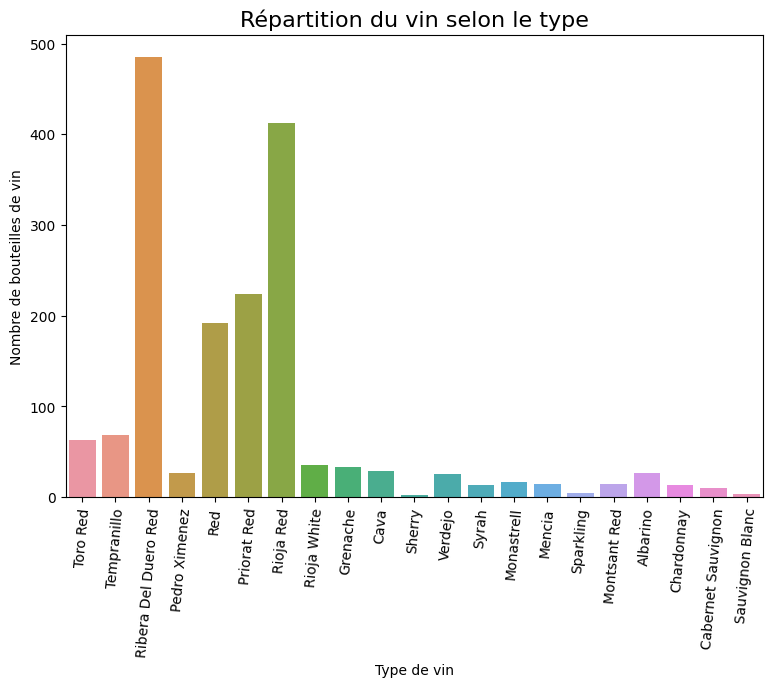

In [21]:
fig, ax = plt.subplots(figsize=(9,6))

plot = sns.countplot(data=df, x='type')
plot.set_xticklabels(plot.get_xticklabels(), rotation=85)
plt.xlabel('Type de vin')
plt.ylabel('Nombre de bouteilles de vin')
plt.title('Répartition du vin selon le type', fontsize=16)
plt.show()

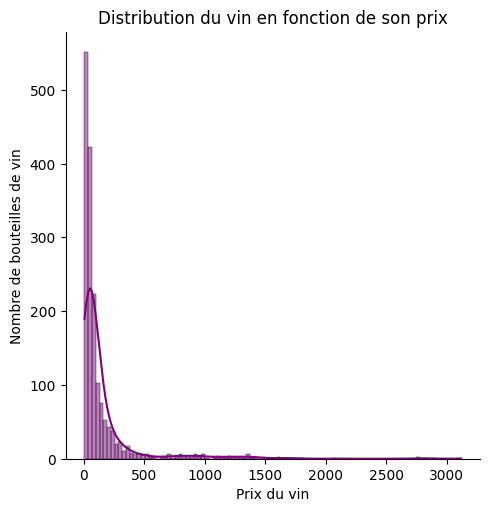

In [22]:
sns.displot(data=df, x='price', kde=True, color='purple', bins=100)
plt.xlabel('Prix du vin')
#plt.xlim((0, 400))
plt.ylabel('Nombre de bouteilles de vin')
plt.title('Distribution du vin en fonction de son prix')
plt.show()

#### On tente de catégoriser les types de vins en rouge ou blanc

In [23]:
df['color'] = df['type']

In [24]:
df['color'].replace({'Rioja White': 'white', 'Cava': 'white', 'Pedro Ximenez': 'white', 'Albarino': 'white', 'Verdejo': 'white', 'Chardonnay': 'white', 'Sparkling': 'white', 'Sauvignon Blanc': 'white', 'Sherry': 'white'}, inplace=True)

In [25]:
df['color'].loc[df['color'] != 'white'] = 'red'

/root/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


### Création du modèle de ML

Définition de la target et des features

In [26]:
X = df.drop(columns=['price', 'type'])
y = df['price']

Création de 2 datframes pour l'entraînement et le test

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=60)

Pipeline

In [28]:
num_pipeline = Pipeline([('imputer', SimpleImputer()), ('scaler', MinMaxScaler())])

cat_transformer = OneHotEncoder(handle_unknown='ignore')

columntransformer = ColumnTransformer([
    ('num_transformer', num_pipeline, ['rating', 'num_reviews', 'body', 'acidity']),
    ('cat_transformer', cat_transformer, ['winery', 'wine', 'year', 'region', 'color'])
    ]
)

In [29]:
lr = LinearRegression()
ridge = Ridge(alpha=0.7)
lasso = Lasso(alpha=0.7)
elastic = ElasticNet(l1_ratio=0.7)

In [30]:
pip = make_pipeline(columntransformer, ridge)

Entraînement du modèle

In [31]:
pip.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_transformer',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['rating', 'num_reviews',
                                                   'body', 'acidity']),
                                                 ('cat_transformer',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['winery', 'wine', 'year',
                                                   'region', 'color'])])),
                ('ridge', Ridge(alpha=0.7))])

Score du R²

In [32]:
score = pip.score(X_test, y_test)
print(f'{int(round(score*100))}% de la variance du prix est expliquée par notre modèle.')

76% de la variance du prix est expliquée par notre modèle.


Cross validation

In [33]:
cross = cross_val_score(pip, X_train, y_train)
print(f'Résultats du R² de la crossvalidation : \n{cross}\n\nSoit un R² moyen de {cross.mean()}')

Résultats du R² de la crossvalidation : 
[0.77424317 0.75621538 0.48618908 0.85136114 0.74149765]

Soit un R² moyen de 0.7219012841106908


### Modèle n°2

In [34]:
X_2 = df.drop(columns=['color', 'price'])
y_2 = df['price']

In [35]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2, random_state=60)

In [36]:
num_pipeline_2 = Pipeline([('imputer', SimpleImputer()), ('scaler', MinMaxScaler())])

cat_transformer_2 = OneHotEncoder(handle_unknown='ignore')

columntransformer_2 = ColumnTransformer([
    ('num_transformer', num_pipeline_2, ['rating', 'body','acidity', 'num_reviews']),
    ('cat_transformer', cat_transformer_2, ['winery', 'wine', 'year', 'type', 'region'])
    ]
)

In [37]:
ridge_2 = Ridge(alpha=0.7)
pip_2 = make_pipeline(columntransformer_2, ridge_2)

In [38]:
pip_2.fit(X_train_2, y_train_2)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_transformer',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['rating', 'body', 'acidity',
                                                   'num_reviews']),
                                                 ('cat_transformer',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['winery', 'wine', 'year',
                                                   'type', 'region'])])),
                ('ridge', Ridge(alpha=0.7))])

In [39]:
score_2 = pip_2.score(X_test_2, y_test_2)
print(f'{int(round(score_2*100))}% de la variance du prix est expliquée par notre modèle.')

77% de la variance du prix est expliquée par notre modèle.


In [40]:
cross_2 = cross_val_score(pip_2, X_train_2, y_train_2)
print(f'Résultats du R² de la crossvalidation : \n{cross_2}\n\nSoit un R² moyen de {cross_2.mean()}')

Résultats du R² de la crossvalidation : 
[0.76883594 0.76212889 0.48908393 0.8549603  0.73665217]

Soit un R² moyen de 0.7223322446075139


### Modèle n°3

In [41]:
mini_price, maxi_price = IQR(df, 'price')

       price
min     6.26
max  3119.08

==> Everything that is less than 0 and more than 263.09 is an outlier !!!


In [42]:
df2 = drop_outliers(df, 'price', mini_price, maxi_price)

New min and max values and number of rows :
min         6.26
max       260.00
count    1513.00
Name: price, dtype: float64


In [43]:
X_3 = df2.drop(columns=['color', 'price'])
y_3 = df2['price']

In [44]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.2, random_state=60)

In [45]:
num_pipeline_3 = Pipeline([('imputer', SimpleImputer()), ('scaler', MinMaxScaler())])

cat_transformer_3 = OneHotEncoder(handle_unknown='ignore')

columntransformer_3 = ColumnTransformer([
    ('num_transformer', num_pipeline_3, ['rating', 'body','acidity', 'num_reviews']),
    ('cat_transformer', cat_transformer_3, ['winery', 'wine', 'year', 'type', 'region'])
    ]
)

In [46]:
ridge_3 = Ridge(alpha=0.7)
pip_3 = make_pipeline(columntransformer_3, ridge_3)

In [47]:
pip_3.fit(X_train_3, y_train_3)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_transformer',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['rating', 'body', 'acidity',
                                                   'num_reviews']),
                                                 ('cat_transformer',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['winery', 'wine', 'year',
                                                   'type', 'region'])])),
                ('ridge', Ridge(alpha=0.7))])

In [48]:
score_3 = pip_3.score(X_test_3, y_test_3)
print(f'{int(round(score_3*100))}% de la variance du prix est expliquée par notre modèle.')

66% de la variance du prix est expliquée par notre modèle.


In [49]:
cross_3 = cross_val_score(pip_3, X_train_3, y_train_3)
print(f'Résultats du R² de la crossvalidation : \n{cross_3}\n\nSoit un R² moyen de {cross_3.mean()}')

Résultats du R² de la crossvalidation : 
[0.61155199 0.55180118 0.61647342 0.61020245 0.63061907]

Soit un R² moyen de 0.6041296245422014


### On décide de garder le modèle n°2

#### On observe les résidus

In [50]:
y_pred = pip_2.predict(X_test_2)

In [51]:
res = y_pred - y_test_2

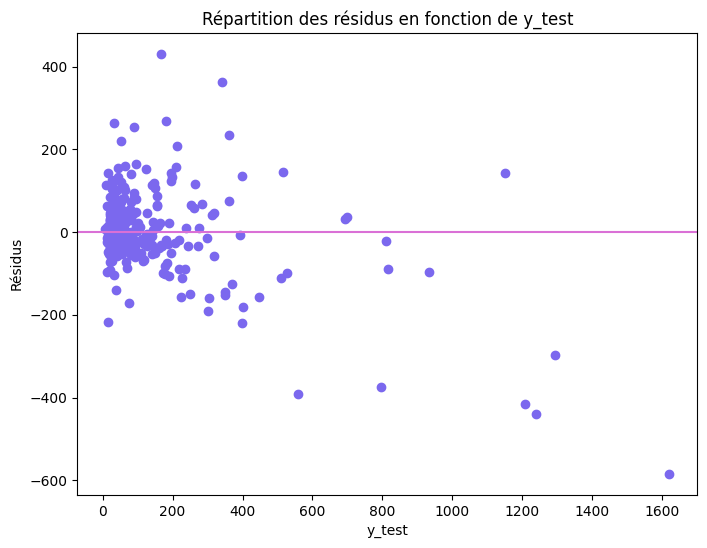

In [52]:
fig, ax = plt.subplots(figsize=(8,6))

plt.scatter(y_test_2, res, color='mediumslateblue')
plt.axhline(y=0, color='orchid')
plt.xlabel('y_test')
plt.ylabel('Résidus')
plt.title('Répartition des résidus en fonction de y_test')
plt.show()

On observe des résidus hétéroscédastiques.

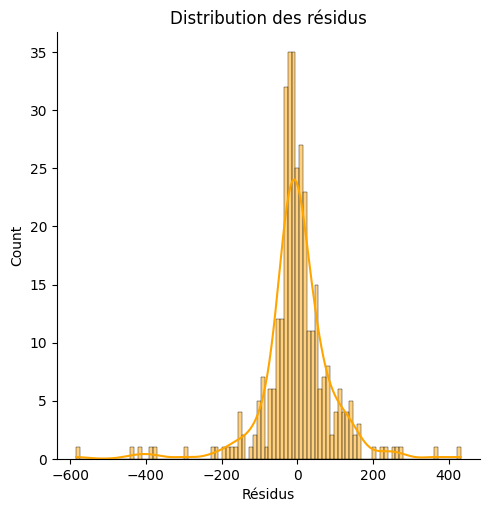

In [53]:
sns.displot(res, kde=True, color='orange', bins=100)
plt.title('Distribution des résidus')           
plt.xlabel('Résidus')     
plt.show()

La distribution des résidus suit tout de même une loi normale.

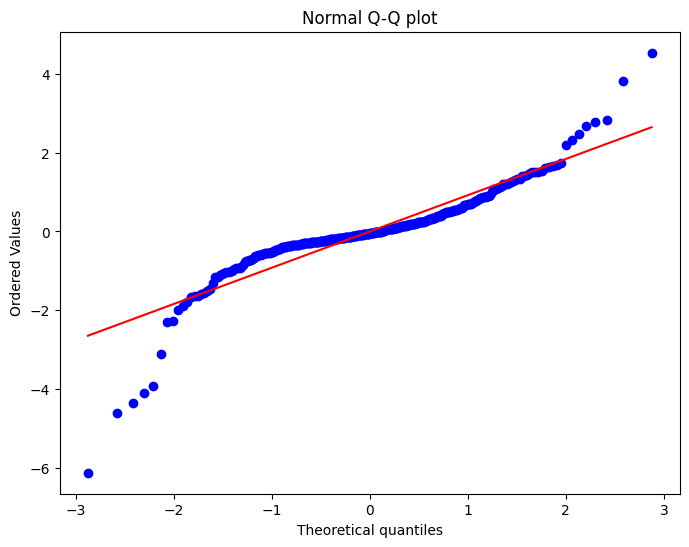

In [54]:
fig, ax = plt.subplots(figsize=(8,6))

z = (res - res.mean())/res.std(ddof=1)
stats.probplot(z, dist='norm', plot=plt)
plt.title('Normal Q-Q plot')
plt.show()

Cependant, il semblerait que les résidus possèdent davantage de données extrêmes qu'une loi normale.

In [55]:
p_value = stats.pearsonr(y_test_2, y_pred)
print(f'Nous avons une p-value à {p_value[1]}, ce qui nous permet d\'affirmer qu\'il y a une corrélation significativement positive entre les résultats prédits et observés.')

Nous avons une p-value à 3.5994464332275453e-110, ce qui nous permet d'affirmer qu'il y a une corrélation significativement positive entre les résultats prédits et observés.


### Proposition d'amélioration :

Nous pourrions essayer de traiter arbitrairement les multiples outliers dans les différentes colonnes à valeur numérique.
Nous pourrions également essayer un autre modèle de régression linéaire.